# Scipy Stats & Anova

This Jupyter Notebook is part of Brian Doheny's submission for the 2021/22 Machine Learning module at Galway-Mayo Insitute of Technology.

In this notebook you will find an introduction to the Scipy.Stats Python library, alongside explanations and examples of the one-way ANOVA analysis technique.

You can view a static version of this notebook via the NBViewer button below:

[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/OtherBrian/machine-learning/blob/main/scipy_stats.ipynb)

Alternatively, you can view an interactive version via the Binder button:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/OtherBrian/machine-learning/49d445dafa1b5e5217dee9183dbbc5625e66f4cf)

# What is Scipy?

Scipy is an open source Python library that allows users to perform a multitude of science related programming[[1]](https://scipy.github.io/devdocs/tutorial/general.html), and is one of the foundations of the Python Data Science toolkit for analysts, data scientists and more. This allows users to get the benefit of a robust set of mathematical and scientific programming functionality, alongside Python's more general strengths as a programming language. As with many such libraries Scipy is built with Numpy in mind, and like Numpy, Scipy is built to be fast so that it can handle large amounts of data quickly and effectively[[2]](https://scipy.org/).

While Scipy can be used for tasks such as optimization, integration and multidimensional image processing, in this notebook I will be concentrating on the Stats module of Scipy, and its functionality surrounding Analysis of Variance (ANOVA). 

## Scipy.Stats

The Scipy.Stats module provides functionality for statistical analyses, and is home to many Python implementations of  the statistical tests that analysts and data scientists need in their day to day work. For example, the T-Test[[3]](https://scipy.github.io/devdocs/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp), Chi Square Test[[4]](https://scipy.github.io/devdocs/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare) and ANOVA[[5]](https://scipy.github.io/devdocs/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway) can all be found within Scipy.Stats alongside many more.

As well as these tests, Scipy also offers an extended range of summary and frequency statistics that are otherwise not available in Numpy. For example, one can use Numpy to get the mean, median and such for their array, but will have to use Scipy.Stats if they wish to measure the kurtosis [[6]](https://scipy.github.io/devdocs/reference/generated/scipy.stats.kurtosis.html#scipy.stats.kurtosis) or skew [[7]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) of that array.

Scipy also offers functionality for generating random data according to various probability distributions, offering a wider range than is otherwise available via Numpy.Random, such as the mysterious sounding Crystalball Distribution [[8]](https://scipy.github.io/devdocs/reference/generated/scipy.stats.crystalball.html#scipy.stats.crystalball). Users can also transform their data so that it fits specific statistical tests via functions such as Box-Cox[[9]](https://scipy.github.io/devdocs/reference/generated/scipy.stats.boxcox.html#scipy.stats.boxcox) or Yeo-Johnson [[10]](https://scipy.github.io/devdocs/reference/generated/scipy.stats.yeojohnson.html#scipy.stats.yeojohnson).

Throughout the remainder of this notebook, I will be focusing on Scipy.Stats' ANOVA functionality. This includes the ANOVA test itself, the tests to confirm that ANOVA is suitable for the given dataset, and some variations of ANOVA to be used when ANOVA conditions are not totally ideal.

_____

# ANOVA (Analysis of Variance)

## What is ANOVA?

Analysis of Variance, more commonly referred to as ANOVA, is a statistical test that is used to check if there are significant differences between two or more groups of observations. The test determines whether or not a given  dependent variable (e.g. salary) has a linear relationship with a given independent categorical variable (e.g. ethnicity or education level), and so it belongs the family of Linear Models[[11]](https://www.statsmodels.org/stable/user-guide.html#regression-and-linear-models). When using ANOVA, the null hypothesis is that there is no significant difference between the various groups, that they are all equal, and so if the test finds that this null hypothesis is unlikely to be true, we can assume that there are in fact significant differences between the groups. I will be introducing null hypotheses in more depth later in this notebook.

ANOVA works by using the mean value of each group of observations, along with the variance of the observations, to calculate an F-statistic. This F-statistic can then be compared to the F distribution (or an F table) to tell us what probability there would be of getting such an extreme F-statistic purely by chance (i.e. if there were no actual difference between the two groups)[[12]](https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/). When assessing the p-value of the F-statistic, it is common practice to accept a p-value less than 0.05 as being "statistically significant", as it represents a less than 5% probability that these results were due to chance. Some industries or use-cases may require somewhat different p-value thresholds, depending on the risks of a Type 1 or Type 2 error. See the Hypothesis Testing section for more details on p-values, Type I errors and Type II errors.

In this notebook I will be introducing One Way ANOVA, which tests for differences on one categorical variable (e.g. ethnic group). Other variations of ANOVA exist that take into account multiple variables, such as Two-way ANOVA which groups observations based on two or more indepedent variables (e.g. gender AND ethic group)[[13]](https://www.scribbr.com/statistics/two-way-anova/).

## Hypothesis Testing

When running experiments or performing observational analysis on different groups, such as would be the case with ANOVA, we must start off with a hypothesis that we wish to test for. This hypothesis clearly details the difference we expect to see from the treatment, or across the various groups, and thus clarifies exactly which measure will be used in the statistical tests to be performed (i.e. ANOVA in this case). For example, in a randomized drug test the hypothesis may be that the drug lowers the blood pressure of the people taking the drug after a certain amount of time.

### Null and Alternative Hypothesis

With our initial hypothesis detailing what we expect to see, we can then create a **Null Hypothesis** and an **Alternative Hypothesis**[[14]](https://courses.lumenlearning.com/introstats1/chapter/null-and-alternative-hypotheses/)[[15]](https://www.analyticsvidhya.com/blog/2021/01/an-introduction-to-hypothesis-testing/). The alternative hypothesis is simply the change that you anticipate. So in my prior example, the alternate hypothesis would be "patients that take this drug have lower blood pressure by 5% after X amount of time".

Meanwhile the null hypothesis is opposite of the alternative hypothesis, and states that there is no change or meaningful difference between the groups. In the drug trial example, the null Hypothesis would be "patients that take this drug see no change in their blood pressure after x amount of time".

As the analysis is performed, it is the null hypothesis that is assumed to be true until we find statistically significant evidence that it can be rejected and the alternative hypothesis accepted. It should be noted that the term "hypothesis" is used here for good reason, as rejecting the null hypothesis does not necessarily mean that the alternative hypothesis is the true cause of the change or difference, but that without other alternative hypotheses it can be accepted until such a time as it too is rejected.

This is where the p-value kicks in. The p-value tells us the probability of having encountered results as extreme as the results found in the given analysis if there were no notable difference. If the p-value is high, then the probability of the results being down to chance is high, and therefore there isn't sufficient evidence to reject the null hypothesis. However, if the p-value is low (usually below 0.05) then the null hypothesis can be confidently rejected, and the alternative hypothesis accepted. 

The null hypothesis and threshold for the p-value is set before the experiment or analysis begins, so as to prevent "P-Hacking" whereby results can be massaged or thresholds changed in order to promote a seemingly statistically significant result, that otherwise wouldn't have rejected the null hypothesis [[16]](https://scienceinthenewsroom.org/resources/statistical-p-hacking-explained/). P-Hacking is not necessarily a conscious decision, as our own biases can mean we accept results that otherwise wouldn't be significant, and so it's important that we set the thresholds before we begin the analysis so that these errors don't crop up.

### Type I & Type II Errors

We use p-values as a threshold for whether or not to reject a null hypothesis, as it limits the likelihood of an error being made. In hypothesis testing, errors fall into two main categories known as **Type I Errors** and **Type II Errors**[[17]](https://www.scribbr.com/statistics/type-i-and-type-ii-errors/).

Type I Errors are false positive results. In these situations the null hypothesis is rejected when it is actually the more correct of the two hypotheses. By setting a p-value threshold of 5% or lower, we will only reject the null hypothesis if our results would only be this extreme 5% or less of the time. This means we can at least be confident that our results are at least 95% likely to be significant, and so the risk of a type I error having occurred is 5% or less. However, if P-hacking has taken place, then the likelihood of a type I error increases.

Type II Errors are false negatives. In these situations the null hypothesis was not rejected, when it actually should. This may be due to the distribution of the observed samples not fully representing the population, or that the measure used in the analysis was not the one that was actually impacted. The risk of type II errors can be reduced by increasing the statistical power of the analysis by increasing the sample size, increasing the size of the effect we are measuring for (e.g. instead of looking for a 5% improvement, look for 10%), or by raising the p-value threshold (with obvious knock on effects for more potential type 1 errors). 

The definition of type I and type II errors is often depicted on a matrix[[18]](https://towardsdatascience.com/type-i-type-ii-error-simplified-covid-vaccine-example-c99b31ddbf41), such as in this illustration:

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/errors.png?raw=true" alt="example of classifier" style="width: 600px;"/>

While analysts aim to avoid either error when designing their experiments, type I errors are generally seen as the more critical of the two. This is because a type I error results in rejecting the null hypothesis, and thus accepting a new insight and possibly new actions as a result. On the other hand, a type II error maintains the status quo. In most scenarios, taking action based on a type I error has the potential to cause more damage then carrying on with the status quo (as would be the case with a type II error). This may not be true in all scenarios, as there may be situations where inaction is the larger risk. This can lead to certain industries, or even just specific experiments, utilizing different p-value thresholds dependent on where the larger risk is. 

Now that we've introduced the basics of hypothesis testing, we can now go into the finer details of ANOVA.

_____

# The ANOVA formula

As mentioned, ANOVA actually calculates an F-statistic, which we can then use to find the p-value, but how is that F-statistic calculated?

The formula for the F-statistic is[[19]](https://www.youtube.com/watch?v=fFnOD7KBSbw):
$$
F = \frac{MST}{MSE}
$$

Where:
* $F$ is the F-statistic
* $MST$ is the Mean Sum of squares Treatment
* $MSE$ is the Mean Sum of squares Error

This formula looks simple enough, but how do we get the values for MST and MSE?


### Total Sum of Squares - SS(Total)

If you're familiar with regression analysis, you'll likely recognise the term "sum of squares" within the name of this value. In regression, the sum of squares would involve comparing the model's predicted values to the actual values, squaring those differences and then summing them so as to give us a measure of the model's accuracy. In the case of ANOVA, the model isn't making a prediction as such, however we do still want to know the dispersion of points, and so the sum of squares can provide that context. 

Here we'll be going through each of the observations one by one, minusing the overall mean from it, and squaring that difference. We then sum all of those squares differences to give us the Total Sum of Squares. The formula for this is: 

$$
SS(Total) = \sum^{N}(X_{ij} - \bar{X})^2
$$

* $N$ is the total number of observations across all of the groups combined
* $X_{ij}$ is the j'th observation from the i'th group
* $\bar{X}$ is the overall mean (i.e. the mean of the dependent variable across all of the groups combined

With the Total Sum of Squares, we now know the variability across all of the groups combined (i.e. the full dataset). The next step is to see if any of the groups contribute more to that variability than others. In order to do this, we'll need the Sum of Squares Treatment ($SST$) and Sum of Squares Error ($SSE$), as they will actually be used for the $F$ statistic formula itself.

As we go through these, it's important to remember that:

$$ SS(Total) = SST + SSE
$$

That is to say that the Sum of Squares Treatment ($SST$) plus the Sum of Squares Error ($SSE$) equals the Sum of Squares Total. This should make sense as the SS(Total) is the total variability within the whole dataset, and the $SST$ and $SSE$ are just telling us where that variability is coming from - the differences in the groups (a.k.a treatments) or just variability in the error across all of the groups.


### Sum of Squares Treatment (SST) & Mean Squared Treatment (MST)

To begin with, we'll look at the Sum of Squares Treatment ($SST$) as this will go towards our numerator in the $F$ statistic formula. The formula for $SST$ looks much the same as the formula for SS(Total), however we're now comparing the mean of each individual group against the overall mean. Again we square this difference, and sum them to get our $SST$ across the groups. The formula is:

$$
SST = \sum^k_{j=1} n_j (\bar{X}_j - \bar{X})^2
$$

* $k$ is the total number of groups.
* $j$ is the current group being measured
* $n_j$ is the number of samples within this particular group
* $\bar{X}_j$ is the mean of the given group
* $X$ is the overall population mean

Now that we have the $SST$, we must divide it by the Degrees of Freedom for our treatment ($df_T$). This is simply the total number of groups ($k$) minus 1. So if we have 4 groups, the degrees of freedom for the treatment would be 3.

$$
df_T = k - 1
$$

We can now combine our $SST$ and $df_T$ to give us the $MST$ which will serve as the numerator in our final formula.

$$
MST = \frac{SST}{df_T}
$$

If there's not much difference between the overall mean and the means of each group, then our $SST$ will be quite small, thus leading to a smaller numerator in the final ANOVA formula. If there are significant differences between the group means and the overall mean the $SST$, and later $MST$, will be larger. However, if there is a lot of variation within the groups, we may end up with a larger denominator which evens this out and keeps the $F$ statistic lower.

### Sum of Squares Error (SSE) & Mean Squared Error (MSE)

While the $SST$ is looking at the differences in the means of each group, the $SSE$ measures the variation within each group. This is done by counting how many observations are within a given group, minusing 1, and then multiplying that value by the variance (${\sigma_j}^2$) of that group. We then sum these values to get the variability within the groups. The formula is:

$$
SSE =\sum^k_{j=1} (n_j - 1){\sigma_j}^2
$$

* $k$ is the total number of groups.
* $j$ is the current group being measured
* $n_j$ is the number of samples within this particular group
* ${\sigma_j}^2$ is the variance within this particular group

As with $SST$, we now need to divide the $SSE$ by the Degrees of Freedom for our Error ($df_E$). In this case it is the total number of observations across the entire dataset, minus the number of groups. So if we had 100 observations across 4 groups, the $df_E$ would be 96 (100-4).

$$
df_E = N - k
$$

From here we can now calculate the Mean Squared Error ($MSE$):

$$
MSE = \frac{SSE}{df_E}
$$

If there's a lot of variability within the groups, our $SSE$ will be larger, thus reducing the impact of a large $MST$. Similarly low variability within groups will result in a lower denominator, which will amplify the impact of a larger $MST$, and thus lead to a larger $F$ statistic.

### Bringing it back together

Now that we know how $MST$ and $MSE$ are calculated, we can plug them into our ANOVA formula to get the $F$ statistic:

$$
F = \frac{MST}{MSE}
$$

This $F$ statistic can then be compared to the $F$ distribution to find the p-value[[20]](https://www.sciencedirect.com/topics/mathematics/f-distribution).

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/f_distribution.png?raw=true" alt="example of classifier" style="width: 600px;"/>

The above is a rough illustration of what the $F$ distribution will look like. In actual fact it's shape may differ somewhat depending on the parameters involved, but as we can see from this illustration, the higher the $F$ statistic is, the lower the p-value associated with it. This will only occur if the $MST$ is greater than the $MSE$, which does make sense when we look at the final formula for the $F$ statistic. 

If the group averages are significantly different, $MST$ will be larger. Meanwhile, at the same time, if the group variances aren't as significantly different, $MSE$ will be smaller. This would tell us that the different means across the groups are significant, and not just down to variation within each group, and thus we end up with a larger $F$ statistic.

_____

# When can we use ANOVA?

Not all datasets are suitable for a standard ANOVA analysis, and so there are six guiding assumptions[[21]](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php) that should apply to a dataset before applying the ANOVA technique. In the event that one or more of these guiding assumptions are not met, there may be alternative versions of ANOVA available, or else the analyst will have to explore other analysis techniques to use in their situation.

## 1. The dependent variable is continuous.

As ANOVA uses the mean and variance to compare the dependent variable in each group, it is therefore important that the dependent variable itself is continuous. For example variance generally cannot be measured on categorical variables, and so wouldn't provide one of the key measures necessary for ANOVA.

## 2. The independent variables are spread across at least 2 or 3 groups.

The goal with ANOVA is to see if the dependent variable is sufficiently different between each group within the dataset, and so it figures that we would need a few distinct groups to perform the analysis on. Therefore a minimum of 2 groups are required, although it should be noted that when there are just 2 groups present, we could use a T test instead of ANOVA[[22]](https://www.statology.org/what-is-the-difference-between-a-t-test-and-an-anova/). The benefits of ANOVA really kick in once we get to 3 groups or more.

## 3. Observations must be independent.

Each observation should not be impacted by the other observations in its own group, or in the groups around it. In the event that observations are not completely independent, we may see our results impacted by bias and external factors[[23]](https://www.statisticshowto.com/assumption-of-independence/). For example if we look at the salary of three students after 15 years, these measures will be independent (most of the time) as the salary of one student should not impact the salary of another. However, if we are measuring how many grams of cake were eaten at a party by the three students, and there's a limited supply of cake, then we may see that one students cake eating capacity was hampered by the voraciousness of another student and thus the results would be misleading.

## 4. No significant outliers should be present within the dataset.

ANOVA uses variance and mean in order to compare the groups within the dataset, and so any outliers have the potential to significantly skew those two measures and thus impact the results. Using the students example above, if one of those students was Mark Zuckerberg then we might conclude that dropping out of college leads to the highest salary after 15 years.

## 5. The dependent variable should be normally distributed for each group.

As variance and mean are the two measures used to compare the groups, we should ensure that the distributions are approximately normally distributed. We can do this by plotting the dependent variable into a histogram for each group, or make use of some handy statistical tests which I'll be introducing later in this notebook.

## 6. There should be homogeneity of variances

Again, as variance is one of the main measures being used for ANOVA, it's important that the variances are somewhat similar. If one of the groups has a variance that is significantly different to the others (i.e. very low and very high values) then it will impact the trustworthiness of our results.

As mentioned above, there are workarounds and other flavours of ANOVA available if one or more of these assumptions are not met. I will introduce some of these when we go through the Students dataset later. For now though, let's go through a dataset that is perfectly ideal for ANOVA and meets all of these assumptions - the Diet dataset.

_____

# Anova Examples

# The Diet Dataset - an ideal ANOVA toy dataset

To show how we can test for each of the above 6 assumptions, I'll first walk us through the Diet dataset. I have acquired this dataset from Sheffield University's datasets for teaching[[24]](https://www.sheffield.ac.uk/mash/statistics/datasets). 

This dataset contains the details and measurements of 78 people that each went through a particular diet for a period of 6 weeks. The variables present in the dataset include their gender, age, height, their weight prior to the diet starting, their weight after six weeks, and which diet they were on. There are 3 possible diets that an individual could be on, and there was no switching between the diets during the experiment.

For this ANOVA analysis, we will look at the difference in weight before and after 6 weeks of the diet for the participants that were on each of the 3 diets.

For clarity, I will import each Python library as I need it, rather than all in one go. To begin with, I will be importing Pandas for its DataFrame functionality, alongside Seaborn and Matplotlib.pyplot for data visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I'll now load the dataset into a Pandas dataframe.

In [2]:
# Load diet.csv into a dataframe.
diet_df = pd.read_csv('https://raw.githubusercontent.com/OtherBrian/machine-learning/main/datasets/diet.csv')

# Print the total number of observations in the dataset.
print(f"There are {len(diet_df)} observations in this datset.\nYou can see the first 5 observations below.")

# Preview the first 5 observations.
diet_df.head()

There are 78 observations in this datset.
You can see the first 5 observations below.


,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


Immediately we can see that the first two observations are missing data. They have no gender entered, and their pre.weight and weight6weeks values are exactly the same. I'm therefore assuming that for whatever reason these could not be completed, and so I will only include observations that have all values present.


In [3]:
# A few observations don't have a value for gender, and have no difference in pre/post weight. 
# Removing any observations with no value for gender.
diet_df = diet_df[diet_df['gender'].isin(['0', '1'])]

# Print the new total number of observations in the dataset.
print(f"There are now {len(diet_df)} observations in this datset.")

There are now 76 observations in this datset.


The dataset has lost two observations, but 76 observations are still sufficient for this analysis. We can also check how the observations are split between each diet, via the value_counts method.

In [4]:
# Check how many observations are in each diet.
diet_df['Diet'].value_counts()

3    27
2    25
1    24
Name: Diet, dtype: int64

At present the dataset shows the weight before the diet and after, whereas for this analysis we wish to see the change in weight as that will be our dependent variable. I'll therefore create a new column called "weightChange" to calculate this by subtracting the final weight from the initial weight. Any positive values indicate weight loss over the 6 weeks, whereas any negative values indicate weight gain.

In [5]:
# Going to measure the weight change from each diet.
diet_df['weightChange'] = diet_df['pre.weight'] - diet_df['weight6weeks']

# Preview the first 5 observations.
diet_df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightChange
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
5,4,0,33,171,64,1,61.1,2.9
6,5,0,50,170,65,1,62.2,2.8


Now that the dataset is clean and ready for analysis, I'll create three copies of the dataframe, one for each of the three diets. This will be required for the ANOVA test later.

In [6]:
# Splitting into DataFrames for each of the diets.
diet1 = diet_df[diet_df['Diet'] == 1]
diet2 = diet_df[diet_df['Diet'] == 2]
diet3 = diet_df[diet_df['Diet'] == 3]

At this point the dataset has met assumptions 1 (continuous dependent variable), 2 (categorical independent variable) and 3 (observations must be dependent). In order to check for the remaining three assumptions, exploratory data analysis will be required.

## Exploratory Data Analysis

In order to check for significant outliers in our three dataframes, I'll now calculate their mean weightChange values and plot the weightChange distribution of each of them as a histogram. This will also give us some clue as to whether or not they are normally distributed. I'll include a Kernel Density Estimate (KDE) on each histogram, as this will give us a bit more insight into how normal our three distributions actually are.

In [7]:
# Saving the three dataframes into a dictionary along with their names.
# This will allow me to iterate through them later.
diets = {"diet1" : diet1, 
         "diet2" : diet2, 
         "diet3" : diet3}

# Iterate through each diet and print its name, alongside the average weightChange.
for diet_name, diet_data in diets.items():
    print(f"Average weightChange for {diet_name}: {round(diet_data['weightChange'].mean(),2)}")


Average weightChange for diet1: 3.3
Average weightChange for diet2: 3.27
Average weightChange for diet3: 5.15


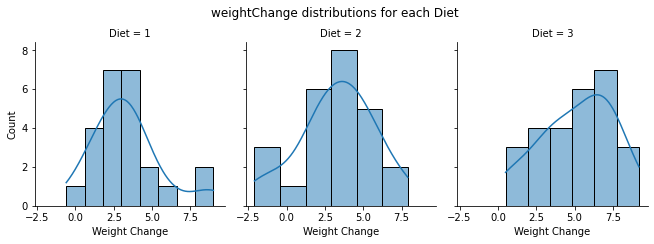

In [8]:
# Plotting the distributions of each of the three diets.
# I'm using the original diet_df here so that I can utilize Seaborn's FacetGrid

# Creating the FacetGrid
g = sns.FacetGrid(diet_df, col="Diet")

# Fill each plot with a histogram, with a Kernel Density Estimate
g.map_dataframe(sns.histplot, x="weightChange", kde=True)

#  Labeling the axes
g.set_axis_labels("Weight Change", "Count")

# Including a title.
g.fig.suptitle("weightChange distributions for each Diet", y=1.05);

While each group has a slightly different shape, we don't see any significant outliers on any of the above histograms. We can therefore say that assumption 4 (no outliers) has been met. 

All three histograms also look appropriately normally distributed, with Diet 3 generally having larger values, and the larger mean. To confirm that these are normally distributed, we can utilize the Shapiro-Wilk test of normality[[25]](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) . This null hypothesis for this test is that the data comes from a normal distribution. Therefore if the p-value is below 0.05, we would assume that the null hypothesis is false and that the data therefore does not come from a normal distribution.

Fortunately, Scipy.Stats is able to perform the Shapiro-Wilk test for us[[26]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Remember, we're hoping that the p-value is above 0.05, as that would mean that the data comes from a normal distribution and thus meets assumption 5.

In [9]:
# Importing the stats module from Scipy so that I can use the Shapiro-Wilks test
from scipy import stats

# Iterate through each diet dataframe.
for diet_name, diet_data in diets.items():
    
    # Calculate the p-value from the Shapiro-wilks test
    pvalue = stats.shapiro(diet_data['weightChange'])[1]
    
    # Print diet name and p-value for each diet.
    print(f"{diet_name} Shapiro-Wilk p-value: {pvalue}")
    
    # Print whether or not the p-value means the data is normally distributed.
    if pvalue < 0.05:
        print(f"{diet_name} is not normally distributed!\n")
    else:
        print(f"{diet_name} is normally distributed!\n")

diet1 Shapiro-Wilk p-value: 0.07748671621084213
diet1 is normally distributed!

diet2 Shapiro-Wilk p-value: 0.8721737861633301
diet2 is normally distributed!

diet3 Shapiro-Wilk p-value: 0.37203603982925415
diet3 is normally distributed!



All three of the distributions have met the null hypothesis that they are from normal distributions. This dataset has therefore passed assumption 5. 

Now for the final assumption - homogeneity of variance. For this we can use Levene's test[[27]](https://medium.com/@kyawsawhtoon/levenes-test-the-assessment-for-equality-of-variances-94503b695a57), which has the null hypothesis that the variances are approximately equal. Again we can use Scipy.stats to perform this test [[28]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html), and again we're looking for a p-value above 0.05 in order to confirm homogeneity of variance across the three diets.

In [10]:
# Calculate the p-value from Levene's test
pvalue = stats.levene(diet1['weightChange'], diet2['weightChange'], diet3['weightChange'])[1]

# Print the p-value
print(f"Levene's test P-value: {pvalue}")

# Print whether or not the p-value means the variance is homogeneous.
if pvalue < 0.05:
    print("The groups do not have homogeneity of variance!")
else:
    print("The groups do have homogeneity of variance!")

Levene's test P-value: 0.6312856401117967
The groups do have homogeneity of variance!


The p-value is significantly higher than 0.05, and so we can confidently say that the dataset has now passed assumption 6. That means that it meets all of the assumptions necessary for ANOVA, so we can progress with the analysis!

Going through the six assumptions above has given us the confidence that this dataset is suitable for ANOVA. This checking of the assumptions has actually done a lot of the heavy lifting we would need for an analysis. From here, it's simply one line of code from Scipy.stats to perform the actual ANOVA, as we just need to use the f_oneway function with the dependent variable from each group[[29]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html). Here the null hypothesis is that all of the groups are the same, and that there is no significant difference between them. Therefore a p-value below 0.05 would allow us to reject that null hypothesis and would suggest that there is a difference between the three groups.

## Using the ANOVA formula
Before we use Scipy.stats for this ANOVA, let's revisit the ANOVA formula and put it into action. We can then use Scipy.Stats to confirm our calculation for this dataset.

A reminder, the formula for the F-statistic is:
$$
F = \frac{MST}{MSE}
$$

We'll start with the MST. The formula for this section is:

$$
MST = \frac{SST}{df_T}
$$

First we'll calculate the $SST$ via the following formula:

$$
SST = \sum^k_{j=1} n_j (\bar{X}_j - \bar{X})^2
$$

* $k$ is the total number of groups.
* $j$ is the current group being measured
* $n_j$ is the number of samples within this particular group
* $\bar{X}_j$ is the mean of the given group
* $X$ is the overall population mean


In [11]:
# The squared difference for each group will be stored here.
squares = []

# Iterate through each of the dataframes in the diets dictionary declared previously
for diet_data in diets.values():
    
    # Calculate the three variables for the formula for each dataframe, n, x_bar and x.
    n = len(diet_data)
    x_bar = diet_data['weightChange'].mean()
    x = diet_df['weightChange'].mean()
    
    # The SST formula
    square = n*((x - x_bar) ** 2)
    
    # Store it in the squares list.
    squares.append(square)

sst = sum(squares)

print(f"The Sum of Squares Treatment is: {sst}")

The Sum of Squares Treatment is: 60.527008382066214


Next we need the Degrees of Freedom. This is the number of groups minus 1.

$$
df_T = k - 1
$$

In [12]:
# Length of the diets dictionary -1
df_t = len(diets) - 1

print(f"The Degrees of Freedom (treatment) is: {df_t}")

The Degrees of Freedom (treatment) is: 2


Now we divide the $SST$ by the Degrees of Freedom to get the $MST$:
$$
MST = \frac{SST}{df_T}
$$

In [13]:
mst = sst/df_t

print(f"The Mean Squared Treatment is: {mst}")

The Mean Squared Treatment is: 30.263504191033107


With the $MST$ calculated, I'll now calculate the $MSE$:

$$
MSE = \frac{SSE}{df_E}
$$

I'll first need the $SSE$:

$$
SSE =\sum^k_{j=1} (n_j - 1){\sigma_j}^2
$$

* $k$ is the total number of groups.
* $j$ is the current group being measured
* $n_j$ is the number of samples within this particular group
* ${\sigma_j}^2$ is the variance within this particular group


In [14]:
# Errors for each group will be stored here.
errors = []

# Iterate through each dataframe in the diets dictionary declared above.
for diet_data in diets.values():
    
    # Calculating the n and variance for each group
    n = len(diet_data)
    var = diet_data['weightChange'].var()
    
    # The formula for each error.
    error = (n - 1) * var
    errors.append(error)

# Sum the errors to get the SSE.
sse = sum(errors)

print(f"The Sum of Squares Error is: {sse}")

The Sum of Squares Error is: 410.4018074074072


For the $MSE$, the Degrees of Freedom is determined by the total number of observations in the whole dataset minus the number of groups.

$$
df_E = N - k
$$

In our case, the full dataset has 76 observations (after being cleaned of the incomplete observations).

In [15]:
df_e = len(diet_df) - 3

print(f"The Degrees of Freedom is: {df_e}")

The Degrees of Freedom is: 73


Now we divide the SSE by the Degrees of Freedom to get the MSE:
$$
MSE = \frac{SSE}{df_E}
$$


In [16]:
mse = sse/df_e

print(f"The Mean Squared Error (MSE) is: {mse}")

The Mean Squared Error (MSE) is: 5.621942567224756


Finally, the $MST$ is divided by the $MSE$ to give the $F$ statistic.

In [17]:
f = mst/mse
print(f"The F-Statistic is: {f}")

The F-Statistic is: 5.38310447485993


This F-statistic is well above 1, and so I expect it has a low p-value associated with it. Fortunately, Scipy.Stats f_oneway function gives both the F-statistic and the p-value. We'll also be able to confirm that the F-Statistic manually calculated above is in fact correct.

In [18]:
# Calculate the f_statistic and p_value for the ANOVA test
f_statistic, pvalue = stats.f_oneway(diet1['weightChange'], diet2['weightChange'], diet3['weightChange'])

# Print the f_statistic and pvalue.
print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA p-value: {pvalue}\n")

# Print whether or not the results are significant, with a p-value threshold of 0.05.
if pvalue < 0.05:
    print("The groups are significantly different!")
else:
    print("The groups are not significantly different!")

ANOVA F-statistic: 5.383104474859926
ANOVA p-value: 0.006595853108669741

The groups are significantly different!


There we have it! The manual calculation of the $f$ statistic was correct, and as expected the p-value for such an extreme F-statistic was far below 0.05 (it was 0.006). We can therefore say that there is a statistically significant difference in the weight loss observations across the three groups. 

However, this doesn't tell us which groups are different from each other, only that there is a difference among them. In situations such as this, we can use post-hoc analysis to provide more granular insight into the differences between each group.

### Why run Post-Hoc analysis? Why not perform T-Tests for each combination?

In the introduction to the six assumptions for ANOVA analysis, I mentioned that T-tests could actually be used to check for a significant difference between two groups. In a situation such as this, where we have just 3 diets and we know there is a difference between them, it could be tempting to just run a T-test for each of the combinations. However, this raises the risk of encountering a type I error.

We generally assume significance if the p-value is less than 0.05. This means there's a 5% chance on any analysis that we'll make a type 1 error and conclude that the results are statistically significant when they are in fact not. If we run multiple tests, each with a 5% chance of having a type I error, then the likelihood of there being at least one type 1 error increases as we do more tests[[30]](https://statisticsbyjim.com/anova/post-hoc-tests-anova/). You can find a humorous example of this via the popular webcomic XKCD[[31]](https://xkcd.com/882/): 

<img src="https://imgs.xkcd.com/comics/significant.png" alt="a webcomic from xkcd showing the risks of performing multi t-tests" style="height: 1200px;"/>

Post-hoc analyses reduce the risks of making such type I errors as it adjusts the p-value for each combination of tests. It can also be significantly more efficient for the user to do, especially as the number of groups increases.

For situations like this where we've been able to use standard ANOVA due to all six ANOVA assumptions having been met, we are able to use the Tukey's HSD test to see which groups differ from the others[[32]](https://sciencing.com/what-is-the-tukey-hsd-test-12751748.html). At the time of writing Scipy.stats does not include this feature, and so I will be using another popular statistical library called Statsmodels[[33]](https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html). It's also worth pointing out that whereas Scipy.stats is more geared towards arrays (hence why we split the original dataframe into one for each diet), Statsmodels is aimed more at Pandas Dataframes, so I will be using the original diet_df here.

In [19]:
# Import the Tukey HSD test from statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# endog is the dependent variable (weightChange).
# groups is the independent variable (Diet).
# alpha is the p-value threshold. In this case anything below 0.05 will reject the null hypothesis.
tukey = pairwise_tukeyhsd(endog=diet_df['weightChange'],
                          groups=diet_df['Diet'],
                          alpha=0.05)

# Print the Tukey table
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   -0.032    0.9 -1.6531 1.5891  False
     1      3   1.8481 0.0188  0.2567 3.4396   True
     2      3   1.8801 0.0152  0.3057 3.4546   True
---------------------------------------------------


As we look at this table, the main value we're focusing on is the p-adj value, as this is the adjusted p-value. If this is below 0.05, then we can reject the null hypothesis that all groups are the same. Fortunately, the table also explicitly tells us this in the final column, "reject". 

## Conclusion

From the above table we can see that diets 1 and 3 are significantly different, and diets 2 and 3 are significantly different. We previously saw that diet 3 generally had larger weightChange values, and had the larger average weightChange, and so we can conclude that that increase in weightChange for diet 3 was statistically significant.

That diet dataset is a popular dataset for teaching ANOVA as it passes all of the assumptions quite neatly and requires very little cleaning or pre-processing. Unfortunately we're unlikely to encounter such data in the real world as data is often messy, is missing values and doesn't always pass all six assumptions. In order to demonstrate this, I will now perform another ANOVA analysis on a dataset which is closer to what we are likely to encounter in the real world.

_____


# Students Dataset - A more realistic ANOVA experience

The students dataset, made available via Freie Universität Berlin[[34]](https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/ANOVA/One-way-ANOVA-Hypothesis-Test/index.html) contains data on 8239 students across various subject areas, and includes details such as test scores, height, weight, gender, salary, religion and their salary.

For the one-way ANOVA analysis, I will use Salary as the dependent variable, and the student's Major as the independent variable. A student cannot have two majors, and the future salary of a political science major should (hopefully) have no impact on the salary of an environmental sciences major.

## Importing the Dataset & Exploratory Data Analysis

First, I'll import the data from a CSV file, and do some exploratory data analysis so as to get a better understanding of the dataset. I will also print the number of observations in the dataframe, and preview the first 5 observations.

In [20]:
# Load the XSV into a Pandas dataframe
students_df = pd.read_csv('https://raw.githubusercontent.com/OtherBrian/machine-learning/main/datasets/students.csv')

# Print the number of observations in the dataframe.
print(f"There are {len(students_df)} observations in this dataset.")

# Preview the first 5 observations.
students_df.head()

There are 8239 observations in this dataset.


,row,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
0,1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
1,2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
2,3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
3,4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
4,5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


Already I can see a few NaN (Not a Number) values for salary, and so I will be removing these from the dataset. ANOVA requires a continuous dependent variable, and so these NaN variables cannot be used.

In [21]:
# Filter the dataframe so that it only includes observations that have a salary value.
students_df = students_df[students_df['salary'].notna()]

# Print the new number of observations in the dataset.
print(f"There are now {len(students_df)} observations in the dataset.")

There are now 1753 observations in the dataset.


This has substantially reduced the size of the dataset, from the original 8239 students to 1753. This is still more than enough for ANOVA analysis. Before moving on I'll confirm that Salary is in fact a continuous variable, as we'd expect.

In [22]:
# Print the summary statistics for the 'salary' column.
students_df['salary'].describe()

count     1753.000000
mean     42522.112364
std      10333.139906
min      11444.141653
25%      35206.541598
50%      41672.009748
75%      49372.540906
max      75596.793441
Name: salary, dtype: float64

All of these values are floating point numbers, and so we can be sure it is a continuous variable. Also we can see that the median (50th percentile) and the mean are very close to each other (41672 and 42552 respectively). This suggests that it's quite likely that these salaries are somewhat normally distributed. I will confirm this on a later step by utilizing the Shaprio-Wilk test again. 

We can also see that the minimum and maximum values are around three standard deviations (std) from the mean. This tells us that there are no extreme outliers, and also reinforces the assumption that the salaries are normally distributed.

Already we have confirmed that this dataset fulfills two of the six assumptions for running an ANOVA.
**1) The dependent variable is continuous.** <br>
**4) There's no significant outliers.**

Next I'll look at how many possible values we have for "major" in order to determine the categorical independent variables.

In [23]:
# Print the values and their frequency for the 'major' column.
students_df['major'].value_counts()

Environmental Sciences        345
Biology                       330
Economics and Finance         295
Political Science             289
Mathematics and Statistics    288
Social Sciences               206
Name: major, dtype: int64

We certainly have more than the two categorical groups required for ANOVA. We also know that it's not possible for a student to have more than one major. This means the dataset fulfills another two of the essential assumptions for ANOVA.<br>
**2) Two or more independent categorical variables** <br>
**3) Independence of observations**

## Checking for Normality

Next I'll take a look at the distribution of salaries for each of these groups, and determine if they are normally distributed. As before, I will overlay the histograms with a kernel density estimate so as to give us a better idea of the shape of each distribution.

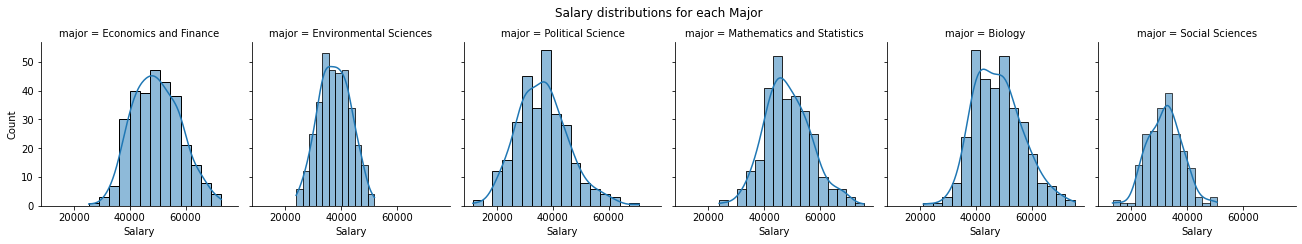

In [24]:
# Create the FacetGrid, splitting the data on "major"
g = sns.FacetGrid(students_df, col="major")

# Create a histogram of the "salary" for each "data" with a kernel denisty estimate
g.map_dataframe(sns.histplot, x="salary", kde=True);

# Label the axes.
g.set_axis_labels("Salary", "Count")

# Add a title.
g.fig.suptitle("Salary distributions for each Major", y=1.05);

Each of these distributions look to be fairly normally distributed. However, to confirm this, I will use the Shapiro-Wilk test. A reminder that a p-value below 0.05 rejects the null hypothesis that the data is normally distributed. In order to meet assumption 5, the p-value must be above 0.05.

In [25]:
# Slicing the dataset for each major.
env_df = students_df[students_df['major'] == 'Environmental Sciences']
bio_df = students_df[students_df['major'] == 'Biology']
ecf_df = students_df[students_df['major'] == 'Economics and Finance']
pos_df = students_df[students_df['major'] == 'Political Science']
mas_df = students_df[students_df['major'] == 'Mathematics and Statistics']
sos_df = students_df[students_df['major'] == 'Social Sciences']

# Creating a dictionary for each dataframe slice and the major's name to iterate through.
df_dict = {'Environmental Sciences': env_df, 
           'Biology': bio_df, 
           'Economics and Finance': ecf_df,
          'Political Science': pos_df,
          'Mathematics and Statistics': mas_df,
          'Social Sciences': sos_df}

# Creating a list to store the names of any majors that pass the Shapiro-Wilk test
normal_independent_variables = []

# Perform the Shapiro Wilk test on each dataframe. 
#Print the result, and add to normal_majors if p_value is above 0.05
for major, data in df_dict.items():
    statistic, p_value = stats.shapiro(data['salary'])
    print(f'{major} Shapio-Wilk test p-value: {round(p_value, 3)}')
    if p_value >= 0.05:
        normal_independent_variables.append(major)

# Print the majors that are found to be normally distributed.
print('\nNormally distributed independent variables (where p > 0.05): ')
print(*normal_independent_variables, sep = ", ") 


Environmental Sciences Shapio-Wilk test p-value: 0.224
Biology Shapio-Wilk test p-value: 0.003
Economics and Finance Shapio-Wilk test p-value: 0.167
Political Science Shapio-Wilk test p-value: 0.01
Mathematics and Statistics Shapio-Wilk test p-value: 0.094
Social Sciences Shapio-Wilk test p-value: 0.603

Normally distributed independent variables (where p > 0.05): 
Environmental Sciences, Economics and Finance, Mathematics and Statistics, Social Sciences


Of the six majors, four are normally distributed. I will therefore continue with these four for now, as they pass assumption **5) The dependent variable should be normally distributed for each group**. 

## Checking for Homogeneity of Variance

I have one assumption left to check - the homogeneity of variance. For this I can use Levene's test again. Like the Shapiro-Wilk test, the Levene's test will output a p-value, and if it's greater than 0.05 we can assume that the homogeneity of variance assumption has been met.

In [26]:
# Doing Levene's test against the four dataframes that passed the normality assumption.
pvalue = stats.levene(env_df['salary'], 
                      ecf_df['salary'], 
                      mas_df['salary'], 
                      sos_df['salary'])[1]

# Print the pvalue from the Levene's test.
print(f"Levene's test p-value: {pvalue}")

# Print whether or not the variance is homogeneous.
if pvalue < 0.05:
    print("The groups do not have homogeneity of variance!")
else:
    print("The groups do have homogeneity of variance!")

Levene's test p-value: 1.0769895950989218e-12
The groups do not have homogeneity of variance!


When all four majors are included, the homogeneity of variance assumption is not met as the p-value is far below 0 (e-12 tells us that there are 11 0s before the 1, and so it's actually 0.000000000001). 

After trying various combinations of the previous four majors I found that Economics & Finance, and Maths & Statistics do pass the homogeneity of variance assumption, and so I will continue with these two.

In [27]:
# Repeating Levene's test for two groups that have homogeneity of variance
pvalue = stats.levene(ecf_df['salary'], 
                      mas_df['salary'])[1]

print(f"Levene's test p-value: {pvalue}")
if pvalue < 0.05:
    print("The groups do not have homogeneity of variance!")
else:
    print("The groups do have homogeneity of variance!")

Levene's test p-value: 0.44704786466598634
The groups do have homogeneity of variance!


These two have a much higher p-value, and so meet the last assumption for ANOVA. 

## One Way ANOVA

We now have two groups that meet all six of the ANOVA assumptions, and so we can now run the ANOVA analysis to see if there is a significant difference between the two groups.

In [28]:
f_statistic, pvalue = stats.f_oneway(ecf_df['salary'], mas_df['salary'])

print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA p-value: {pvalue}")
if pvalue < 0.05:
    print("The groups are significantly different!")
else:
    print("The groups are not significantly different!")

ANOVA F-statistic: 3.2203876889371306
ANOVA p-value: 0.07324612866614046
The groups are not significantly different!


## One Way ANOVA Conclusion

This p-value is above 0.05, and so we should not reject the null hypothesis that both groups have the same salary. For now we cannot say that Economics & Finance and Mathematics & Statistics majors have significantly different salary distributions, however the p-value is close to 0.05. It may be that more observations would change this outcome.

Before moving on, I should point out that because we only have two groups remaining in this scenario, we can actually use a T-Test instead of ANOVA. Both tests will provide the same result, but whereas ANOVA can analyse more than 2 groups, the T-Test can only be used to compare one group to another. The T-Test can also be performed via Scipy.Stats[[35]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).

In [29]:
# Using the T-Test for scipy.stats
pvalue = stats.ttest_ind(ecf_df['salary'], mas_df['salary'])[1]

print(f"T-Test p-value: {pvalue}")
if pvalue < 0.05:
    print("The groups are significantly different!")
else:
    print("The groups are not significantly different!")

T-Test p-value: 0.07324612866615295
The groups are not significantly different!


As expected, the p-value is exactly the same as we saw with ANOVA.
_____

# Anova Variations

Above we have seen two examples of a standard ANOVA used on ideal datasets (after some cleaning). However in situations where our data doesn't meet all six assumptions, hope is not lost. There are other forms of ANOVA or alternative techniques that can be utilized when datasets miss one or two of the assumptions, as we saw with some of the students' majors.

# Kruskal-Wallis Test - For when the data is not normally distributed

Early into the exploratory data analysis of the Students dataset, I found that only four of the six majors had normally distributed salaries, and so two had to be dropped from the ANOVA analysis. It's not uncommon to find that we lack enough observations to know for sure if the data is normally distributed, or the data that we do have suggests that it isn't normally distributed, and in situations like this we can turn to the Kruskal-Wallis test[[36]](https://users.sussex.ac.uk/~grahamh/RM1web/Kruskal-Wallis%20Handoout2011.pdf)[[37]](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-3.php). This test utilizes the median instead of the mean, and has its own assumptions, much like ANOVA[[38]](https://statistics.laerd.com/spss-tutorials/kruskal-wallis-h-test-using-spss-statistics.php). 

This test can also be performed via Scipy.stats[[39]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html).

In [30]:
pvalue = stats.kruskal(env_df['salary'],
              bio_df['salary'],
              ecf_df['salary'],
              pos_df['salary'],
              mas_df['salary'],
              sos_df['salary'])[1]

print(f"Kruskal-Wallis p-value: {pvalue}")
if pvalue < 0.05:
    print("The groups are significantly different!")
else:
    print("The groups are not significantly different!")

Kruskal-Wallis p-value: 1.1777179685065247e-166
The groups are significantly different!


This p-value is far below 0.05, and so the Kruskal-Wallis test is telling us that there is a significant difference between the six majors. As before, with the one-way ANOVA, it doesn't tell us which groups are significantly different from the others, and so a Post-Hoc test is required.

## Post-Hoc Analysis for the Kruskal-Wallis test

When the Kruskal-Wallis test suggests a significant difference, as ours has, we can use Dunn's post-hoc test to determine where the differences are[[40]](https://stats.stackexchange.com/questions/25815/post-hoc-tests-after-kruskal-wallis-dunns-test-or-bonferroni-corrected-mann-wh). At the time of writing, this test appears to only be available via the Scikit Posthocs library[[41]](https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn/).

In [31]:
# Import the scikit posthocs library
import scikit_posthocs as sp

# Using the posthoc_dunn function with the students_df dataframe.
# val_col is the dependent variable (salary in this case)
# group_col is the independent variable (major in this case)
results = sp.posthoc_dunn(students_df, val_col = 'salary', group_col = 'major')

# Display the dataframe containing the results.
results

,Biology,Economics and Finance,Environmental Sciences,Mathematics and Statistics,Political Science,Social Sciences
Biology,1.000000e+00,3.196209e-02,1.376463e-42,3.914185e-01,1.280404e-45,5.893191e-73
Economics and Finance,3.196209e-02,1.000000e+00,7.738891e-54,2.148365e-01,9.297246e-57,3.353093e-85
Environmental Sciences,1.376463e-42,7.738891e-54,1.000000e+00,6.611028e-45,2.647589e-01,3.903162e-10
Mathematics and Statistics,3.914185e-01,2.148365e-01,6.611028e-45,1.000000e+00,6.077601e-48,4.152249e-75
Political Science,1.280404e-45,9.297246e-57,2.647589e-01,6.077601e-48,1.000000e+00,4.030183e-07
Social Sciences,5.893191e-73,3.353093e-85,3.903162e-10,4.152249e-75,4.030183e-07,1.000000e+00


This is a table of the p-values of each major compared to each other through pairwise comparisons. If the p-value is below 0.05, then we can reject the null hypothesis that the two groups are the same.

In the current state, it is quite difficult to clearly read which combinations are significantly different. I'll therefore adjust the values so that any p-values that are below 0.05 will instead be replaced by the string "Significant".

In [32]:
# Iterate through each column of the results dataframe.
for col in results.columns:
    # If the p-value is less than 0.05, replace the value with the string "Significant"
    results.loc[results[col] < 0.05, col] = 'Significant'

# Display the dataframe.
results

,Biology,Economics and Finance,Environmental Sciences,Mathematics and Statistics,Political Science,Social Sciences
Biology,1,Significant,Significant,0.391418,Significant,Significant
Economics and Finance,Significant,1,Significant,0.214837,Significant,Significant
Environmental Sciences,Significant,Significant,1,Significant,0.264759,Significant
Mathematics and Statistics,0.391418,0.214837,Significant,1,Significant,Significant
Political Science,Significant,Significant,0.264759,Significant,1,Significant
Social Sciences,Significant,Significant,Significant,Significant,Significant,1


## Kruskal-Wallis Conclusion

We can now clearly see that Mathematics & Statistics, and Economics & Finance is the only combination that does not reject the null hypothesis. This conclusion is in line with what we found out from the one-way ANOVA at least. 

Otherwise, all of the other combinations reject the null hypothesis, and so suggests that there are significant differences between them.
_____

# Welch's ANOVA - For when groups lack homogeneity of variance

We saw that when Levene's test was used on all four of our normally distributed independent variables in the Students dataset, the test found that they did not have homogeneity of variances. This meant that all four majors were not suitable for ANOVA, and so I continued with the two majors that were. In situations like this, we can instead use Welch's ANOVA[[42]](https://www.statisticshowto.com/welchs-anova/). This is available via the Statsmodels library [[43]](https://www.statsmodels.org/dev/generated/statsmodels.stats.oneway.anova_oneway.html).

In [33]:
# Importing the oneway ANOVA functionality from statsmodels.stats
from statsmodels.stats import oneway

# Running the oneway ANOVA test, with variance set as "unequal" and Welch correction as True.
# This makes it a Welch's ANOVA.
pvalue = oneway.anova_oneway([env_df['salary'], 
                              ecf_df['salary'], 
                              mas_df['salary'], 
                              sos_df['salary']], 
                             use_var="unequal", 
                             welch_correction=True)[1]

# Print the p-value
print(f"Welch's ANOVA p-value: {pvalue}")

# Print whether or not the p-value suggests significant differences.
if pvalue < 0.05:
    print("The groups are significantly different!")
else:
    print("The groups are not significantly different!")

Welch's ANOVA p-value: 2.623052455425018e-131
The groups are significantly different!


Here we can see that the p-value is far below 0.05 (the e-131 tells us that there's 130 0's after the decimal point), and so there's certainly a statistically significant difference between these groups. However, again it doesn't tell us which groups are significantly different from each other. For this we will need to run another post-hoc test.

## Post-Hoc Analysis for Welch's ANOVA

In the Diet example, I was able to use Tukey's HSD test because the dataset met the assumption of homogeneity of variance. However, in this example I have had to use Welch's ANOVA due to the differing variances. Fortunately, there is the Games-Howell Post-Hoc Multiple Comparisons Test which acts very similarly to Tukey's HSD test[[44]](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-4.php). At present, the only Python library I have found with this test available is Pinguoin[[45]](https://pingouin-stats.org/generated/pingouin.pairwise_gameshowell.html).

In [34]:
# Using the list of normally distributed majors we created earlier to filter the dataframe.
gameshowell_df = students_df[students_df['major'].isin(normal_independent_variables)]

In [35]:
import pingouin as pg

# data is the dataframe
# dv is the dependent variable (salary)
# betwen is the independent variable (major)
pg.pairwise_gameshowell(data=gameshowell_df, dv='salary',
                        between='major').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Economics and Finance,Environmental Sciences,49696.172,37652.678,12043.494,582.379,20.680,501.087,0.001,1.638
1,Economics and Finance,Mathematics and Statistics,49696.172,48443.507,1252.665,697.901,1.795,580.968,0.277,0.148
2,Economics and Finance,Social Sciences,49696.172,32044.006,17652.166,656.922,26.871,497.983,0.001,2.436
3,Environmental Sciences,Mathematics and Statistics,37652.678,48443.507,-10790.829,580.435,-18.591,492.009,0.001,-1.482
4,Environmental Sciences,Social Sciences,37652.678,32044.006,5608.672,530.457,10.573,403.291,0.001,0.930
5,Mathematics and Statistics,Social Sciences,48443.507,32044.006,16399.501,655.199,25.030,491.296,0.001,2.280


This results table doesn't explicitly call out which combinations should reject the null hypothesis, like Tukey table did earlier. However we can go through and look at the "pval" column one by one to see for ourselves.

## Welch's ANOVA Conclusion
From this we can see that most of the above combinations are statistically significantly different from each other. The only combination that is not statistically significant is the Economics & Finance and Mathematics & Statistics pairing. These results are in line with what was found via the One-way ANOVA, the T-Test and the Kruskal-Wallis test.
_____

# A note on the Shapiro-Wilks test for normality

Previously we used the Shapiro-Wilks test to check whether or not the dependent variable is from a normal distribution, however if we take a look at the description in Scipy.Stats' documentation[[26]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html), we see that:

```For N > 5000 the W test statistic is accurate but the p-value may not be.```

In situations where we have more than 5000 observations, the p-value becomes less trustworthy, and so other tests should be considered. One such test is the Anderson-Darling test [[46]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson). The Anderson-Darling test can test for a number of different distributions, with the normal distribution being among the available options. 

To show a quick example of this test, I'll load in the Irish Weather dataset. I sourced this dataset from Kaggle [[47]](https://www.kaggle.com/conorrot/irish-weather-hourly-data), and it includes the hourly weather measurements from numerous weather stations across Ireland from January 1st 1990 to June 1st 2020. Needless to say, the original dataset is massive, and so I've just taken the Athenry data to show here.

In [36]:
# Load the dataset into a Pandas dataframe
weather_df = pd.read_csv('https://raw.githubusercontent.com/OtherBrian/machine-learning/main/datasets/irish_weather.csv')

# temp is currently a string, so I'm converting it to a float by removing the punctuation first.
weather_df['temp'] = weather_df['temp'].str.extract(r'(\d+.\d+)').astype('float')

# Some measurements are missing, so dropping them.
weather_df = weather_df[weather_df['temp'].notna()]

print(f"The weather dataset now has {len(weather_df)} observations.")

The weather dataset now has 76202 observations.


With the data now loaded, we can take a look at the distribution of the temperatures during this time.

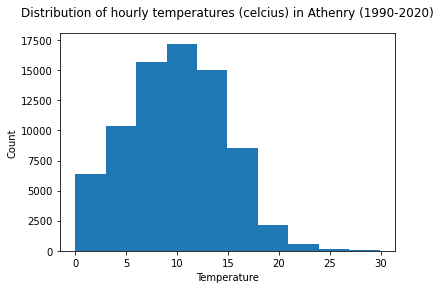

In [37]:
# Plotting the temperatures as a histogram
plt.hist(weather_df["temp"])

# Label the axes
plt.xlabel("Temperature")
plt.ylabel("Count")

# Include a title
plt.title("Distribution of hourly temperatures (celcius) in Athenry (1990-2020)", y=1.05);

Anyone living around East Galway wouldn't be surprised by this distribution of temperatures. While it does have a rough normal shape, it is right-skewed and so may not actually be from a normal distribution.

Let's try the Shaprio-Wilks test first and see how that looks. Remember, the P-value here is less reliable over 5000 observations, and we have 76202 in this dataset.

In [38]:
# Using the Shapiro-Wilks test on the weather dataframe
pvalue = stats.shapiro(weather_df['temp'])[1]

# Printing the p-value
print(f"Shapiro-Wilks p-value: {pvalue}")

Shapiro-Wilks p-value: 0.0


/Users/Brian/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


A p-value of 0.0, coupled with the warning from Scipy, suggests that the test did not work in this scenario, and so it's time to use the Anderson-Darling test instead.

As previously mentioned, we can select from a few distribution options for this test, and so I'll be using 'norm' in this case.

In [39]:
# Using the Anderson-Darling test from Scipy.Stats
# Setting the null hypothesis distribution to normal ("norm")
stats.anderson(weather_df['temp'], dist='norm')

AndersonResult(statistic=90.00576422091399, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

The results for the Anderson-Darling test look very different to the previous tests we have looked at, as they only returned a test statistic and the p-value. 

In this case, we have a test statistic (statistic), an array of critical values and their corresponding significance levels. 

If the test statistic is higher than the critical value at any particular significant level, then we reject the null hypothesis that the data is from a normal distribution.

Throughout this notebook we have been using 0.05 as our significant threshold, and so it is the "5." significance level we need to look at here. The corresponding critical value for this significant value is 0.787, and the test statistic is 90. The test is therefore telling us to reject the null hypothesis, and that this data is not from a normal distribution.

Had the test statistic been below the critical value, the dependent variable would have passed assumption 5 (the dependent variable should be normally distributed for each group) and we could have continued checking the data against the final assumption.

As the datasets that we encounter become ever larger, it is important to keep in mind that the Shapiro-Wilk test will not always be reliable. The Anderson-Darling test can ensure that we can still check for normality, and trust the result, as we work with large datasets.
_____

# Conclusion

In this notebook, I have introduced one-way ANOVA and some of the variations and alternative tests available to us when our data doesn't meet the assumptions necessary for ANOVA. I have also introduced Scipy.Stats, and how we can use it to perform ANOVA, as well as the other Python libraries required for the various flavours of ANOVA we have encountered. Finally I've provided an alternative to the Shapiro-Wilk test of normality for large datasets, as otherwise the results can be unreliable.

This has not been an exhaustive introduction to ANOVA, as there is still two-way ANOVA, ANCOVA and other variants available to us. These take into account multiple independent variables, which results in many more smaller groups for which we can test for significant differences. I decided to concentrate on one-way ANOVA here, and provide a more comprehensive overview of this valuable analysis technique.
_____

# Resources

[1]  “Introduction — SciPy v1.9.0.dev0+1138.384db09 Manual”. 2021. [Online]. Available: https://scipy.github.io/devdocs/tutorial/general.html<br>
[2] "SciPy". 2021. [Online]. Available: https://scipy.org/<br>
[3] "scipy.stats.ttest_1samp — SciPy v1.9.0.dev0+1138.384db09 Manual". 2021. [Online]. Available: https://scipy.github.io/devdocs/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp<br>
[4] "scipy.stats.chisquare — SciPy v1.9.0.dev0+1138.384db09 Manual". 2021. [Online]. Available: https://scipy.github.io/devdocs/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare<br>
[5] "scipy.stats.f_oneway — SciPy v1.9.0.dev0+1138.384db09 Manual". 2021. [Online]. Available: https://scipy.github.io/devdocs/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway<br>
[6] "scipy.stats.kurtosis — SciPy v1.9.0.dev0+1138.384db09 Manual". 2021. [Online]. Available: https://scipy.github.io/devdocs/reference/generated/scipy.stats.kurtosis.html#scipy.stats.kurtosis<br>
[7] "scipy.stats.skew — SciPy v1.7.1 Manual". 2021. [Online]. Available: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html<br>
[8] "scipy.stats.crystalball — SciPy v1.9.0.dev0+1138.384db09 Manual". 2021. [Online]. Available: https://scipy.github.io/devdocs/reference/generated/scipy.stats.crystalball.html#scipy.stats.crystalball<br>
[9] "scipy.stats.boxcox — SciPy v1.9.0.dev0+1138.384db09 Manual". 2021. [Online]. Available: https://scipy.github.io/devdocs/reference/generated/scipy.stats.boxcox.html#scipy.stats.boxcox<br>
[10] "scipy.stats.yeojohnson — SciPy v1.9.0.dev0+1138.384db09 Manual". 2021. [Online]. Available: https://scipy.github.io/devdocs/reference/generated/scipy.stats.yeojohnson.html#scipy.stats.yeojohnson<br>
[11] "User Guide — statsmodels". 2021. [Online]. Available: https://www.statsmodels.org/stable/user-guide.html#regression-and-linear-models<br>
[12] Stephanie Glen. "F Statistic / F Value: Simple Definition and Interpretation". [Online]. From StatisticsHowTo.com: Elementary Statistics for the rest of us! Available: https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/<br>
[13] Rebecca Bevans. "Two-way ANOVA | When and How to Use it, With Examples". 2020. [Online]. From Scribbr.com. Available: https://www.scribbr.com/statistics/two-way-anova/<br>
[14] "Null and Alternative Hypotheses | Introduction to Statistics". 2021. [Online]. Available: https://courses.lumenlearning.com/introstats1/chapter/null-and-alternative-hypotheses/<br>
[15] Nivedita Bharti. "Hypothesis Testing | Introduction To Hypothesis Testing". 2021. [Online]. From Analytics Vidhya. Available: https://www.analyticsvidhya.com/blog/2021/01/an-introduction-to-hypothesis-testing/<br>
[16] "Statistical P-hacking explained - World Editors Forum". 2021. [Online].  Available: https://scienceinthenewsroom.org/resources/statistical-p-hacking-explained/<br>
[17] Pritha Bhandari. "Type I & Type II Errors | Differences, Examples, Visualizations". 2021. [Online]. From Scribbr.com. Available: https://www.scribbr.com/statistics/type-i-and-type-ii-errors/ <br>
[18] Atul Sharma. "Type-I & Type-II Error Simplified— COVID Vaccine Example | by Atul Sharma | Towards Data Science". 2021. [Online]. From Towards Data Science. Available: https://towardsdatascience.com/type-i-type-ii-error-simplified-covid-vaccine-example-c99b31ddbf41<br>
[19] jbstatistics. "One-Way ANOVA: The Formulas". 2012. [Online video]. Available: https://www.youtube.com/watch?v=fFnOD7KBSbw. [viewed 28 December 2021]. <br>
[20] "F Distribution - an overview | ScienceDirect Topics". 2021. [Online]. Available: https://www.sciencedirect.com/topics/mathematics/f-distribution<br>
[21] "One-way ANOVA in SPSS Statistics - Step-by-step procedure including testing of assumptions". 2021. [Online]. Available: https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php<br>
[22] Zach. "What is the Difference Between a T-test and an ANOVA? - Statology". 2021. [Online]. From Statology. Available: https://www.statology.org/what-is-the-difference-between-a-t-test-and-an-anova/<br>
[23] Stephanie Glen. "Assumption of Independence". 2015. [Online]. From StatisticsHowTo.com: Elementary Statistics for the rest of us! Available: https://www.statisticshowto.com/assumption-of-independence/<br>
[24] "Datasets for teaching - Statistics - MASH - The University of Sheffield". 2021. [Online]. Available: https://www.sheffield.ac.uk/polopoly_fs/1.937195!/file/Diet_R.csv<br>
[25] "Shapiro–Wilk test - Wikipedia". 2021. [Online]. Available: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test<br>
[26] "scipy.stats.shapiro — SciPy v1.7.1 Manual". 2021. [Online]. Available: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html<br>
[27] Kyaw Saw Htoon. "Levene’s Test: The Assessment for Equality of Variances | by Kyaw Saw Htoon | Medium". 2020. [Online]. From Kyaw Saw Htoon. Available: https://medium.com/@kyawsawhtoon/levenes-test-the-assessment-for-equality-of-variances-94503b695a57<br>
[28] "scipy.stats.levene — SciPy v1.7.1 Manual". 2021. [Online]. Available: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html<br>
[29] "scipy.stats.f_oneway — SciPy v1.7.1 Manual". 2021. [Online]. Available: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html<br>
[30] Jim Frost. "Using Post Hoc Tests with ANOVA - Statistics By Jim". [Online]. From Statistics By Jim. Available: https://statisticsbyjim.com/anova/post-hoc-tests-anova/<br>
[31] "xkcd: Significant" [Online Illustration]. Available: https://xkcd.com/882/<br>
[32] Kevin Beck. "What Is the Tukey HSD Test?". 2018. [Online]. From Sciencing. Available: https://sciencing.com/what-is-the-tukey-hsd-test-12751748.html<br>
[33] "statsmodels.stats.multicomp.pairwise_tukeyhsd — statsmodels". 2021. [Online]. Available: https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html<br>
[34] Hartmann, K., Krois, J., Waske, B. (2018): E-Learning Project SOGA: Statistics and Geospatial Data Analysis. Department of Earth Sciences, Freie Universitaet Berlin. [Online]. Available: https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/ANOVA/One-way-ANOVA-Hypothesis-Test/index.html<br>
[35] "scipy.stats.ttest_ind — SciPy v1.7.1 Manual". 2021. [Online]. Available: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html<br>
[36] University of Sussex. "Graham Hole Research Skills Kruskal-Wallis handout, version 1.0, page 1". 2011. [Online]. Available: https://users.sussex.ac.uk/~grahamh/RM1web/Kruskal-Wallis%20Handoout2011.pdf<br>
[37] "One-way ANOVA - Violations to the assumptions of this test and how to report the results | Laerd Statistics". [Online]. Available: https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-3.php<br>
[38] "Kruskal-Wallis H Test in SPSS Statistics | Procedure, output and interpretation of the output using a relevant example". [Online]. Available: https://statistics.laerd.com/spss-tutorials/kruskal-wallis-h-test-using-spss-statistics.php<br>
[39] "scipy.stats.kruskal — SciPy v1.7.1 Manual". 2021. [Online]. Available: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html<br>
[40] "hypothesis testing - Post-hoc tests after Kruskal-Wallis: Dunn's test or Bonferroni corrected Mann-Whitney tests? - Cross Validated". 2012. [Online]. Available: https://stats.stackexchange.com/questions/25815/post-hoc-tests-after-kruskal-wallis-dunns-test-or-bonferroni-corrected-mann-wh<br>
[41] "scikit_posthocs.posthoc_dunn — scikit-posthocs 0.6.6 documentation". 2021. [Online]. Available: https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn/<br>
[42] Stephanie Glen. "Welch’s ANOVA: Definition, Assumptions". 2016. [Online]. From StatisticsHowTo.com: Elementary Statistics for the rest of us! Available: https://www.statisticshowto.com/welchs-anova/<br>
[43] "statsmodels.stats.oneway.anova_oneway — statsmodels". 2021. [Online]. Available: https://www.statsmodels.org/dev/generated/statsmodels.stats.oneway.anova_oneway.html<br>
[44] "One-way ANOVA - How to report the significance results, homogeneity of variance and running post-hoc tests | Laerd Statistics". [Online]. Available: https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-4.php<br>
[45] "pingouin.pairwise_gameshowell — pingouin 0.5.0 documentation". 2021. [Online]. Available: https://pingouin-stats.org/generated/pingouin.pairwise_gameshowell.html<br>
[46] "scipy.stats.anderson — SciPy v1.7.1 Manual". 2021. [Online]. Available: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson<br>
[47] Conor Rothwell. "Irish Weather (hourly data) | Kaggle". 2020. [Online]. Available: https://www.kaggle.com/conorrot/irish-weather-hourly-data 